<a href="https://colab.research.google.com/github/vneumannufprbr/Series-Temporales/blob/main/PredicDemancLTSMDatosBrutosEspaTrad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Caso el dataset energy_dataset.csv sea llamado desde el drive del computador o
# del google drive, abilitar las 2 lineas abajo
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install tensorflow
!pip install keras-tuner
!pip install statsmodels

# Importaciones
import tensorflow as tf
tf.__version__
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.optimizers import SGD, Adam
# incluido por VN
# correlograma y estacionalidad para determinar el tamaño de la ventana (window size)
import statsmodels.api as sm
# Librería para preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import iqr
# Librería para autoajuste de parámetros
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
# Librería pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core import window
from pandas.core import indexes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.4 MB/s eta 0:00:00


/tmp/ipython-input-4-3699842221.py:26: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [5]:
# Carga de la base de datos
#df = pd.read_csv("/content/drive/Othercomputers/Meu computador/Google Drive/Especialização IA UFPR/AAA-Curso IA UFPR/Arquitetura de Dados/Artigos de AI aplicada a Sistemas de Energia/ENCONTRO 02/archive/energy_dataset.csv",  low_memory=False) # dtype=dtype_dict,
#!git clone https://github.com/vneumannufprbr/TrabajosRStudio.git # Dataset con 3.000 instancias
#df = pd.read_csv('TrabajosRStudio/energy_dataset.csv',  low_memory=False) # Dataset con 3.000 instancias # dtype=dtype_dict,
!git clone https://github.com/vneumannufprbr/Series-Temporales.git # Dataset con 35.000 instancias
df = pd.read_csv('Series-Temporales/energy_dataset.csv',  low_memory=False) # Dataset con 35.000 instancias # dtype=dtype_dict,dtype_dict = {
dtype_dict = {
    'time': str,
    'generation biomass': float,
    'generation fossil brown coal/lignite': float,
    'generation fossil gas': float,
    'generation fossil hard coal': float,
    'generation fossil oil': float,
    'generation hydro pumped storage consumption': float,
    'generation hydro run-of-river and poundage': float,
    'generation hydro water reservoir': float,
    'generation nuclear': float,
    'generation solar': float,
    'generation waste': float,
    'generation wind onshore': float,
    'forecast solar day ahead': float,
    'forecast wind onshore day ahead': float,
    'total load forecast': float,
    'total load actual': float,
    'price day ahead': float,
     # ... especificar otros tipos de datos de las columnas aquí
    'price actual': float
}
print(df.dtypes)
df

Cloning into 'Series-Temporales'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 2.28 MiB | 5.16 MiB/s, done.
Resolving deltas: 100% (1/1), done.
time                                            object
generation biomass                             float64
generation fossil brown coal/lignite           float64
generation fossil coal-derived gas             float64
generation fossil gas                          float64
generation fossil hard coal                    float64
generation fossil oil                          float64
generation fossil oil shale                    float64
generation fossil peat                         float64
generation geothermal                          float64
generation hydro pumped storage aggregated     float64
generation hydro pumped storage consumption    float64
generatio

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96.0,NaN,3253.0,30619.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51.0,NaN,3353.0,29932.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36.0,NaN,3404.0,27903.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29.0,NaN,3273.0,25450.0,25801.0,63.93,69.89


In [6]:
df.index = pd.to_datetime(df['time'], utc=True)
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

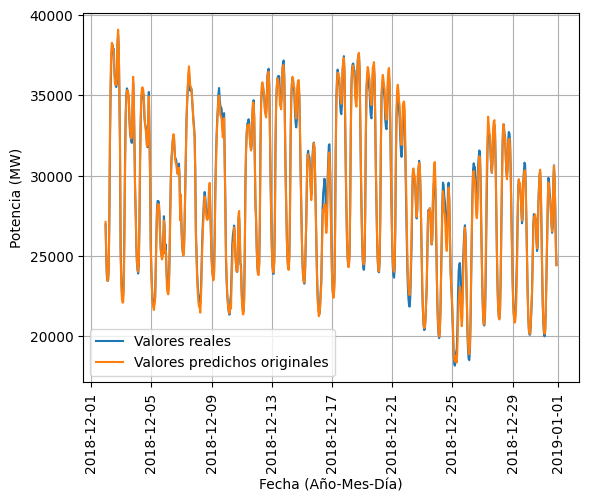

In [7]:
ger_real = df['total load actual']
ger_solar_predito_origem = df['total load forecast']
#ger_real[-240:].plot(label="Valores reais")
#plt.figure(figsize=(10, 6))
plt.plot(ger_real[-24*30:], label='Valores reales')
plt.plot(ger_solar_predito_origem[-24*30:], label='Valores predichos originales')
plt.legend()
plt.grid(True)
plt.ylabel('Potencia (MW)')
plt.xlabel('Fecha (Año-Mes-Día)')
plt.xticks(rotation='vertical');

In [8]:
# Preprocesamiento
# incluido por VN

# Usar el transformador para aplicar la función a tus datos
# Definir una función personalizada para calcular el IQR
#series=ger_real.values.reshape(-1, 1)
#def interquartile(series):
#  return iqr(series)

# Crear un transformador de función usando la función personalizada
#transformer = FunctionTransformer(interquartile, validate=False)

# Usar el transformador para aplicar la función a tus datos
#series = transformer.transform(series)
# Los outliers fueron eliminados

#datos_transformados = transformer.transform(data)
# Los outliers fueron eliminados

#datos_transformados.head()
#plt.plot(data)
#plt.show()
#values1 = df['generation_solar']
#series = values1.values.reshape(-1, 1)

# Calcular el IQR usando la función quantile() de pandas
Q1 = ger_real.quantile(0.25)
Q3 = ger_real.quantile(0.75)
IQR = Q3 - Q1

# Definir límites superior e inferior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
ger_real_filt = ger_real[(ger_real >= lower_bound) & (ger_real <= upper_bound)]

# Verificar la cantidad de outliers removidos
outliers_removed = len(ger_real) - len(ger_real_filt)
print("Outliers removidos:", outliers_removed)
ger_real=ger_real_filt
series = ger_real.values.reshape(-1, 1)
series = series.astype('float64')

# Normalizar los datos de la serie
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series)
ger_real=pd.Series(series.flatten())

Outliers removidos: 36


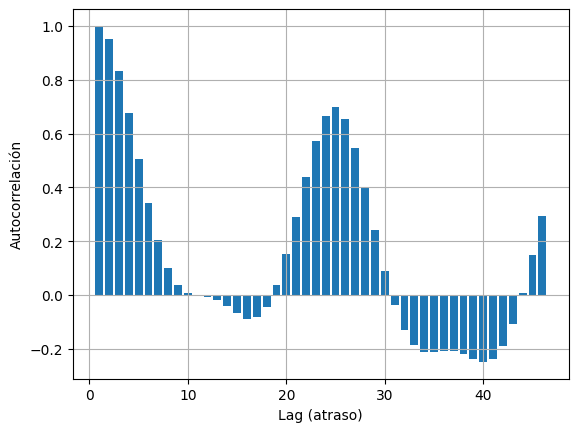

In [9]:
# Correlograma y estacionalidad para determinar el tamaño de la ventana (window size)
# Calcular el correlograma
acf = sm.tsa.acf(ger_real)

# Plotar el correlograma
lags = range(1, len(acf)+1)
#plt.figure(figsize=(10, 6))
plt.bar(lags, acf)
plt.xlabel('Lag (atraso)')
plt.ylabel('Autocorrelación')
#plt.title('Correlograma')
plt.grid(True)
plt.show()

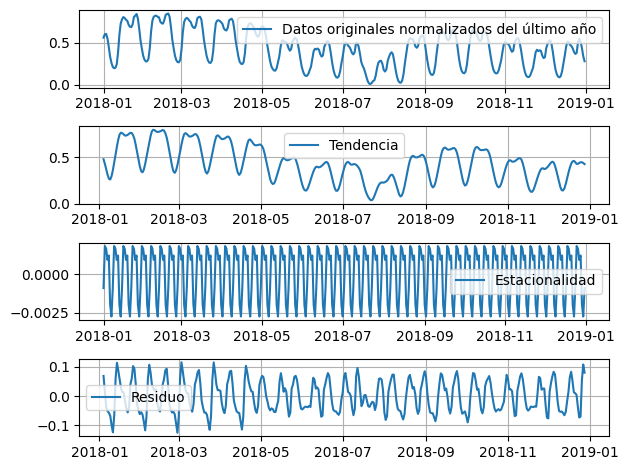

In [10]:
# Definir la serie temporal para identificar la estacionalidad
# Definir la serie temporal
dates = pd.date_range(start='2018-01-01', periods=365, freq='d')
series2 = pd.Series(ger_real.values[-365:], index=dates)

# Convertir el índice a un DatetimeIndex
series2.index = pd.DatetimeIndex(series2.index)

# Descomponer la serie temporal
decomposition = sm.tsa.seasonal_decompose(series2, model='additive')

# Obtener las componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotear las componentes
#plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.grid(True)
plt.plot(series2, label='Datos originales normalizados del último año')
plt.legend(loc='best')
plt.subplot(412)
plt.grid(True)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.grid(True)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.grid(True)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [11]:
# Tamaño de la ventana sugerido por el correlograma y la estacionalidad: 24h
window_size = 24
from pandas.core import window
def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [12]:
X, y = df_to_X_y(ger_real, window_size)
X.shape, y.shape

((35004, 24, 1), (35004,))

In [13]:
X_train, y_train = X[:int(0.8*len(ger_real))], y[:int(0.8*len(ger_real))]
X_val, y_val  = X[int(0.8*len(ger_real)):int(0.9*len(ger_real))], y[int(0.8*len(ger_real)):int(0.9*len(ger_real))]
X_test, y_test = X[int(0.9*len(ger_real)):], y[int(0.9*len(ger_real)):]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((28022, 24, 1), (28022,), (3503, 24, 1), (3503,), (3479, 24, 1), (3479,))

In [14]:
# Autoajuste de hiperparámetros
# Se utiliza la función keras_tuner del paquete Keras-Tuner para realizar la búsqueda
# automática de hiperparámetros para el modelo LSTM. Keras-Tuner es una
# biblioteca que permite optimizar automáticamente los hiperparámetros de un
# modelo de aprendizaje automático.

# La función build_model construye el modelo LSTM con hiperparámetros ajustables.
# El tuner se crea utilizando la función RandomSearch, que realiza una
# búsqueda aleatoria de hiperparámetros. Es posible definir los hiperparámetros
# a ajustar utilizando las clases de Keras-Tuner, como Int para valores
# enteros y Choice para seleccionar entre opciones.

# La búsqueda de hiperparámetros se realiza llamando al método search del tuner,
# pasando los datos de entrenamiento y validación, así como el número de épocas
# para el entrenamiento. Después de la búsqueda, puedes obtener el mejor modelo encontrado
# utilizando el método get_best_models.

# Definir la función de construcción del modelo
timesteps = window_size
input_dim = 1
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=64), # Lo sugerido es step=32
                                dropout=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1),
                                input_shape=(timesteps, input_dim)))
    model.add(keras.layers.Dense(units=1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
                  loss='huber')
    return model

# Definir los hiperparámetros a ser ajustados
hp = HyperParameters()
hp.Int('units', min_value=32, max_value=512, step=32)
hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
# The batch_size is not a parameter of the LSTM layer itself, but rather of the fit method.
#hp.Choice('batch_size', values=[16, 32, 64, 128])  # Adicionando el hiperparametro batch_size

# Crear el tuner
tuner = RandomSearch(build_model, objective='val_loss', max_trials=10, hyperparameters=hp)

# Realizar la búsqueda de hiperparámetros
#tuner.search(x=train_data, y=train_labels, epochs=10, validation_data=(val_data, val_labels))
tuner.search(x=X_train, y=y_train, epochs=5, validation_data=(X_val, y_val))  # Lo sugerido es epochs=10

# Obtener el mejor modelo encontrado
best_model = tuner.get_best_models(num_models=1)[0]

best_model.summary()

Trial 10 Complete [00h 03m 04s]
val_loss: 0.0012762406840920448

Best val_loss So Far: 0.00040355895180255175
Total elapsed time: 00h 59m 01s


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer, LSTM, Dense

#bath=32
#feature=1
#timesteps=24
#X_train_time_major = np.transpose(X_train, (1, 0, 2))
model1 = Sequential()
model1.add(InputLayer((window_size, 1)))
model1.add(LSTM(192, dropout=0.0))#, dropout=0.1,time_major=True, , time_major=True))
# # La capa de dropout=0.3 ayuda a prevenir el sobreajuste
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 192)            │       148,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,545 (588.07 KB)

 Trainable params: 150,545 (588.07 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cp1= ModelCheckpoint('model1/best_model.keras', save_best_only=True)
model1.compile(loss=Huber(), optimizer=Adam(learning_rate=0.01), metrics =[RootMeanSquaredError()])
# función de pérdida huber: model1.compile(loss=MeanSquaredError(), loss=Huber()) es generalmente utilizada en problemas
# de regresión, donde se desea una función de pérdida menos sensible a outliers.
#model1.compile(loss="mse", optimizer=Adam(learning_rate=0.1), run_eagerly=True)

In [18]:
r=model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1], batch_size=64)

Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 0.0278 - root_mean_squared_error: 0.2183 - val_loss: 8.2960e-04 - val_root_mean_squared_error: 0.0407
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - loss: 8.8520e-04 - root_mean_squared_error: 0.0421 - val_loss: 7.1758e-04 - val_root_mean_squared_error: 0.0379
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - loss: 6.9327e-04 - root_mean_squared_error: 0.0372 - val_loss: 6.6334e-04 - val_root_mean_squared_error: 0.0364
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 54ms/step - loss: 6.1400e-04 - root_mean_squared_error: 0.0350 - val_loss: 5.0889e-04 - val_root_mean_squared_error: 0.0319
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - loss: 5.4774e-04 - root_mean_squared_error: 0.0331 - val_loss: 5.4002e-04 - val_root_mean_squared_error: 0.0329
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - loss: 4.5152e-04 - root_mean_squared_error: 0.0300 - val_loss: 4.3530e-04 - val_root_mean_squared_error: 0.0

Text(0, 0.5, 'Loss/RMSE (valores normalizados)')

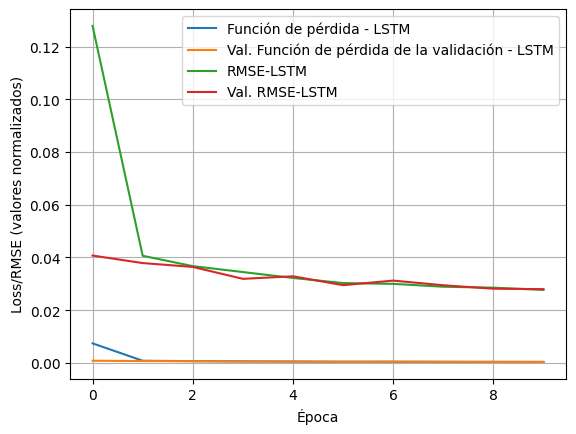

In [19]:
#Plotar la función de pérdida y RMSE
#plt.figure(figsize=(10, 6))
plt.plot(r.history["loss"], label="Función de pérdida - LSTM")
plt.plot(r.history["val_loss"], label="Val. Función de pérdida de la validación - LSTM")
plt.plot(r.history["root_mean_squared_error"], label="RMSE-LSTM")
plt.plot(r.history["val_root_mean_squared_error"], label="Val. RMSE-LSTM")
plt.legend()
plt.grid(True)
plt.xlabel('Época')
plt.ylabel('Loss/RMSE (valores normalizados)')

In [20]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/best_model.keras')

In [21]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
#train_results

# Recuperar valores nominales originales
train_results['Train Predictions'] = scaler.inverse_transform(train_results['Train Predictions'].values.reshape(-1, 1)).flatten()
train_results['Actuals'] = scaler.inverse_transform(train_results['Actuals'].values.reshape(-1, 1)).flatten()
#train_results

876/876 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step


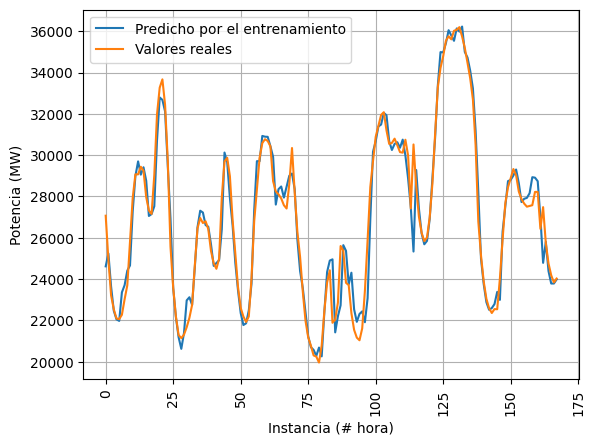

In [22]:
#plt.figure(figsize=(10, 6))
plt.plot(train_results['Train Predictions'][:168], label="Predicho por el entrenamiento")
plt.plot(train_results['Actuals'][:168], label="Valores reales")
#plt.plot(ger_solar_predito_origem.values[:168], label='Predicción original')
plt.legend()
plt.ylabel('Potencia (MW)')
plt.xlabel('Instancia (# hora)')
plt.grid(True)
plt.xticks(rotation='vertical');

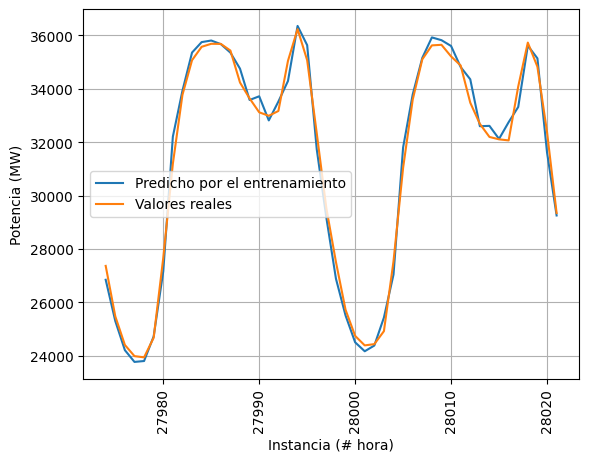

In [23]:
#plt.figure(figsize=(10, 6))
plt.plot(train_results['Train Predictions'][int(0.8*len(ger_real))-48:int(0.8*len(ger_real))], label="Predicho por el entrenamiento")
plt.plot(train_results['Actuals'][int(0.8*len(ger_real))-48:int(0.8*len(ger_real))], label="Valores reales")
#plt.plot(ger_solar_predito_origem[int(0.8*len(ger_real))-48:int(0.8*len(ger_real))], label='Predição original')
plt.legend()
plt.ylabel('Potencia (MW)')
plt.xlabel('Instancia (# hora)')
plt.grid(True)
plt.xticks(rotation='vertical');

In [25]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals':y_val})
#val_results

# Recuperar valores nominales originales
val_results['Val Predictions'] = scaler.inverse_transform(val_results['Val Predictions'].values.reshape(-1, 1)).flatten()
val_results['Actuals'] = scaler.inverse_transform(val_results['Actuals'].values.reshape(-1, 1)).flatten()
#val_results

110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


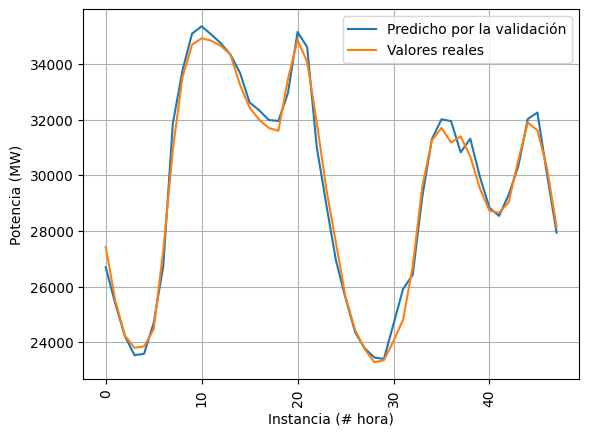

In [26]:
#plt.plot(val_results['Val Predictions'][:48])
#plt.plot(val_results['Actuals'][:48])
#plt.figure(figsize=(10, 6))
plt.plot(val_results['Val Predictions'][:48], label="Predicho por la validación")
plt.plot(val_results['Actuals'][:48], label="Valores reales")
#plt.plot(ger_solar_predito_origem.values[:48], label='Predição original')
plt.legend()
plt.ylabel('Potencia (MW)')
plt.xlabel('Instancia (# hora)')
plt.grid(True)
plt.xticks(rotation='vertical');

In [27]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals':y_test})
#test_results

# Recuperar valores nominales originales
test_results['Test Predictions'] = scaler.inverse_transform(test_results['Test Predictions'].values.reshape(-1, 1)).flatten()
test_results['Actuals'] = scaler.inverse_transform(test_results['Actuals'].values.reshape(-1, 1)).flatten()
#test_results

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


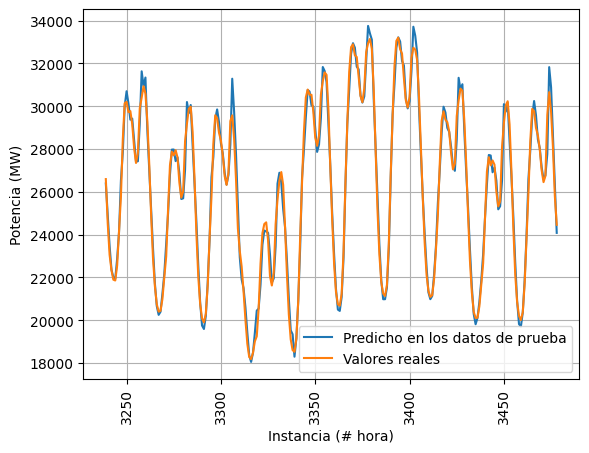

In [28]:
#plt.plot(test_results['Test Predictions'][:48])
#plt.plot(test_results['Actuals'][:48])
#plt.figure(figsize=(10, 6))
plt.plot(test_results['Test Predictions'][-240:], label="Predicho en los datos de prueba")
plt.plot(test_results['Actuals'][-240:], label="Valores reales")
#plt.plot(ger_solar_predito_origem.values[48:], label='Predição original')
plt.legend()
plt.ylabel('Potencia (MW)')
plt.xlabel('Instancia (# hora)')
plt.grid(True)
plt.xticks(rotation='vertical');

In [29]:
# Defina la fecha final de los datos de prueba
data_final_teste = pd.to_datetime('2018-12-31')

# Crear las fechas de validación y prueba
#dates_val = pd.date_range(start='2018-01-01', end=data_final_teste, freq='D')
#dates_test = pd.date_range(start=data_final_teste + pd.DateOffset(days=1), end='2019-12-31', freq='D')
dates_val = pd.date_range(start='2019-01-01', end=data_final_teste, freq='h')
dates_test = pd.date_range(start=data_final_teste + pd.DateOffset(days=1), end='2019-01-31', freq='h')

from copy import deepcopy

recursive_predictions = []
#last_window = deepcopy(X_test[-1])   # Considera el último 1 punto de datos como predictores
last_window = deepcopy(X_test[-720])  # Considera los últimos 720 puntos de datos como predictores
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    next_prediction = model1.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction[0])
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_prediction[0]

# Crear un DataFrame con las predicciones
pred_results = pd.DataFrame({'Date': recursive_dates, 'Predictions': recursive_predictions})
print(pred_results)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

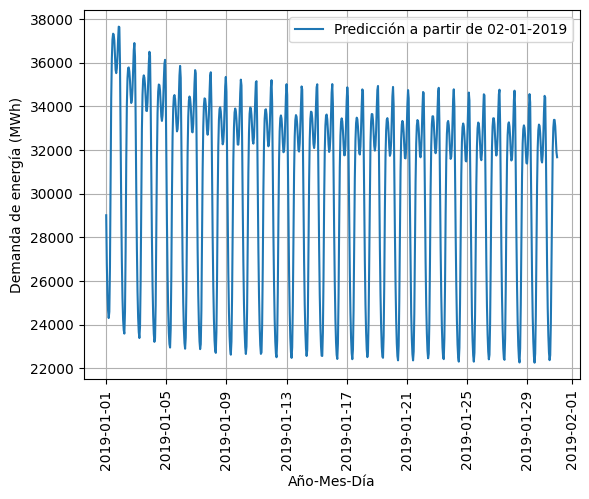

In [30]:
#plt.figure(figsize=(10, 6))
# Recuperar valores nominales originales
pred_results['Predictions'] = scaler.inverse_transform(pred_results['Predictions'].values.reshape(-1, 1)).flatten()

plt.plot(pred_results['Date'], pred_results['Predictions'], label='Predicción a partir de 02-01-2019')
plt.xlabel('Año-Mes-Día')
plt.xticks(rotation='vertical');
plt.ylabel('Demanda de energía (MWh)')
#plt.title('Valores previstos ao longo do tempo')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calcular RMSE para los resultados de prueba
rmse_mw = np.sqrt(mean_squared_error(test_results['Actuals'], test_results['Test Predictions']))

print(f"RMSE en MW: {rmse_mw:.2f}")

RMSE en MW: 522.20


In [ ]:
from sklearn.metrics import r2_score

# Calcular MSE para los resultados de prueba
mse_mw = mean_squared_error(test_results['Actuals'], test_results['Test Predictions'])

# Calcular R2 para los resultados de prueba
r2 = r2_score(test_results['Actuals'], test_results['Test Predictions'])

print(f"MSE en MW^2: {mse_mw:.2f}")
print(f"R2 score: {r2:.4f}")

In [33]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE para los resultados de prueba
mae_mw = mean_absolute_error(test_results['Actuals'], test_results['Test Predictions'])

print(f"MAE en MW: {mae_mw:.2f}")

MAE en MW: 369.14
